<a href="https://colab.research.google.com/github/lopez21j/Data-Analytics-Projects-/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NYPD Arrest Data 2022

## This is a breakdown of every arrest effected in NYC by the NYPD between the months of January-September 2022.
## In my analysis I am going to compare the Bronx to the rest of the city in arrests and severity of the crimes.


In [15]:
import pandas as pd

In [16]:
import numpy as np

In [17]:
import seaborn as sns

In [18]:
import matplotlib.pyplot as plt

In [19]:
import statistics

In [20]:
import datetime

In [21]:
import calendar

In [22]:
missing_values =("n/a", "null")

In [23]:
data = pd.read_csv("/content/NYPD_Arrest_Data__Year_to_Date_-2.csv",na_values=missing_values)

In [24]:
data.info() ##checking the data 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140564 entries, 0 to 140563
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ARREST_KEY                140564 non-null  int64  
 1   ARREST_DATE               140564 non-null  object 
 2   PD_CD                     140188 non-null  float64
 3   PD_DESC                   140564 non-null  object 
 4   KY_CD                     140185 non-null  float64
 5   OFNS_DESC                 140564 non-null  object 
 6   LAW_CODE                  140564 non-null  object 
 7   LAW_CAT_CD                139202 non-null  object 
 8   ARREST_BORO               140564 non-null  object 
 9   ARREST_PRECINCT           140564 non-null  int64  
 10  JURISDICTION_CODE         140564 non-null  int64  
 11  AGE_GROUP                 140564 non-null  object 
 12  PERP_SEX                  140564 non-null  object 
 13  PERP_RACE                 140564 non-null  o

##Cleaning the Data

In [27]:
data.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [28]:
data['ARREST_KEY'].is_unique

True

In [29]:
data.isnull().sum() #checking for missing data 

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                        376
PD_DESC                        0
KY_CD                        379
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1362
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [ ]:
data.head(15)

In [31]:
clean_data=data.drop(['PD_CD', 'KY_CD','LAW_CODE','X_COORD_CD','Y_COORD_CD','Latitude','Longitude','New Georeferenced Column'], axis=1) 
##dropped the columns that I did not intend to use 

In [32]:
clean_data.columns ##checking the columns in the new data frame

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_DESC', 'OFNS_DESC', 'LAW_CAT_CD',
       'ARREST_BORO', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'AGE_GROUP',
       'PERP_SEX', 'PERP_RACE'],
      dtype='object')

In [33]:
clean_data2 = clean_data.rename({'OFNS_DESC': 'TYPE_OF_OFFENSE', 'LAW_CAT_CD': 'LEVEL_OF_OFFENSE','PD_DESC': 'DETAIL_OFFENSE DESC'}, axis=1)
## rename some of the columns to make them easier to understand 

In [104]:
 clean_data2.tail(15)

,ARREST_KEY,ARREST_DATE,DETAIL_OFFENSE DESC,TYPE_OF_OFFENSE,LEVEL_OF_OFFENSE,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,MONTH
140549,248783361,07/30/2022,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,Q,103,0,25-44,M,WHITE,7
140550,251645542,09/27/2022,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES,M,K,90,0,25-44,M,WHITE HISPANIC,9
140551,250986872,09/13/2022,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",GRAND LARCENY,F,K,72,0,18-24,M,WHITE HISPANIC,9
140552,250475660,09/01/2022,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS,M,Q,103,0,25-44,M,BLACK,9
140553,250744929,09/07/2022,"INTOXICATED DRIVING,ALCOHOL",INTOXICATED & IMPAIRED DRIVING,M,Q,105,0,18-24,M,ASIAN / PACIFIC ISLANDER,9
140554,247306163,06/29/2022,"LARCENY,PETIT FROM OPEN AREAS,",PETIT LARCENY,M,S,120,0,25-44,M,WHITE,6
140555,250576362,09/04/2022,"CONTROLLED SUBSTANCE,INTENT TO",DANGEROUS DRUGS,F,K,70,0,25-44,M,BLACK,9
140556,250870373,09/10/2022,"MENACING,UNCLASSIFIED",ASSAULT 3 & RELATED OFFENSES,M,Q,106,0,65+,F,ASIAN / PACIFIC ISLANDER,9
140557,251181507,09/16/2022,"THEFT OF SERVICES, UNCLASSIFIE",OTHER OFFENSES RELATED TO THEF,M,B,46,1,45-64,M,BLACK,9
140558,248182214,07/18/2022,"BURGLARS TOOLS,UNCLASSIFIED",BURGLAR'S TOOLS,M,M,14,0,25-44,M,WHITE HISPANIC,7


In [35]:
clean_data2.isnull().sum()

ARREST_KEY                0
ARREST_DATE               0
DETAIL_OFFENSE DESC       0
TYPE_OF_OFFENSE           0
LEVEL_OF_OFFENSE       1362
ARREST_BORO               0
ARREST_PRECINCT           0
JURISDICTION_CODE         0
AGE_GROUP                 0
PERP_SEX                  0
PERP_RACE                 0
dtype: int64

## Which is the Borough with the most arrests?

In [100]:
clean_data2['ARREST_BORO'].value_counts() ## gives us the count of all the arrests in all Boroughs, Brooklyn has the most arrests and the Bronx was number three.

K    38067
M    34588
B    32309
Q    29353
S     6247
Name: ARREST_BORO, dtype: int64

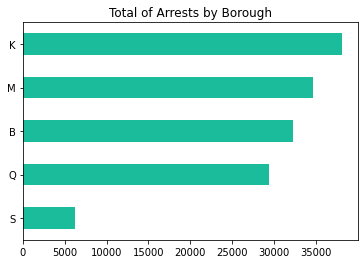

In [43]:
clean_data2['ARREST_BORO'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Arrests by Borough')
##From our Visualization below we could see that Brooklyn is the Borough with the most arrests.

In [88]:
age_group = clean_data2["AGE_GROUP"].tolist() 
print("Most arrests occured within the age group of % s" % (statistics.mode(age_group))) 
## I was curious to see what age group compromised most arrests

Most arrests occured within the age group of 25-44


## What are the top ten occuring crimes in NYC?

In [58]:
clean_data2.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'DETAIL_OFFENSE DESC', 'TYPE_OF_OFFENSE',
       'LEVEL_OF_OFFENSE', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'MONTH'],
      dtype='object')

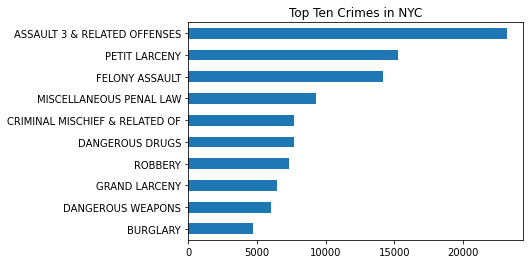

In [63]:
clean_data2.TYPE_OF_OFFENSE.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Top Ten Crimes in NYC")
## Most of the arrests were due to Assault in Third degree. Assault in the third degree is the lowest tier of assault charges. 
## It occurs when someone inflicts physical injury – a bodily impairment or substantial pain – on another person.

In [59]:
Bronx_df= clean_data2[(clean_data2['ARREST_BORO'] == 'B')] ##filtered the data for the Bronx only and renamed it 

In [ ]:
Bronx_df ## checked my data 

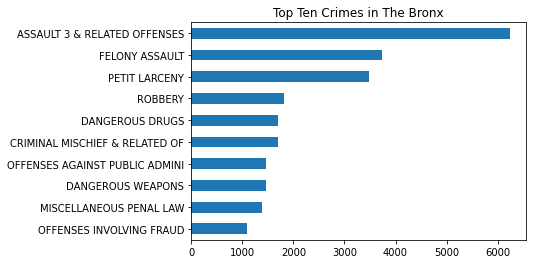

In [62]:
Bronx_df.TYPE_OF_OFFENSE.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Top Ten Crimes in The Bronx")
## The second most occurring crime in the Bronx was for Felony Assault.  
## Felony assault is more serious than Assault in the third degree. Dangerous drugs was the fifth most occurring crime in the Bronx.

In [101]:
clean_data2['LEVEL_OF_OFFENSE'].value_counts() ## Misdemenors was the most common level of offense in NYC

M    74915
F    63227
V      539
9      328
I      193
Name: LEVEL_OF_OFFENSE, dtype: int64

## Total Arrests by Month

In [46]:
clean_data2['MONTH'] = pd.DatetimeIndex(data['ARREST_DATE']).month
clean_data2['MONTH']
## I wanted to look at the number of crimes per month and see if the number of arrests varied by month.
## In order to do this I extracted the month from the 'ARREST_DATE' column and created a new column named 'MONTH'.

0         1
1         1
2         1
3         3
4         2
         ..
140559    9
140560    8
140561    7
140562    9
140563    7
Name: MONTH, Length: 140564, dtype: int64

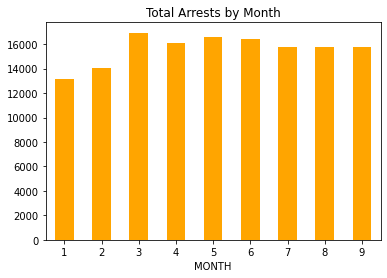

In [105]:
clean_data2.groupby('MONTH').size().plot(kind = 'bar', title ='Total Arrests by Month', color = 'orange',rot=0)
## The graph below shows that the number of arrests do not vary much by month. January was the month with the lowest number of arrests. 

In [48]:
clean_data2['MONTH'].value_counts()

3    16940
5    16552
6    16403
4    16079
9    15804
7    15792
8    15734
2    14070
1    13190
Name: MONTH, dtype: int64

In [49]:
clean_data2['MONTH'].value_counts().mean() ## The average number of arrests per month was about 15,618 arrest per month. 

15618.222222222223

In [89]:
Bronx_df['MONTH'].value_counts().mean() ## The average number of arrests per month in the Bronx was about 3,590 per month 

3589.8888888888887

In [92]:
Bronx_df['MONTH'].value_counts()

3    3870
9    3776
6    3724
8    3693
5    3690
7    3646
4    3608
2    3313
1    2989
Name: MONTH, dtype: int64

## Sex crimes in NYC compared to the Bronx.

In [70]:
sex_crimesNYC= clean_data2[clean_data2.TYPE_OF_OFFENSE.str.contains('SEX CRIMES|RAPE')]
##filtered out the data to only show the offenses that contained 'sex crimes' and 'rape'

In [71]:
sex_crimesNYC['TYPE_OF_OFFENSE'].count()
## Betweem January and September there were a total of 3,761 arrests for sex crimes in NYC. 

3761

In [72]:
sex_crimesNYC.groupby(['TYPE_OF_OFFENSE'])['ARREST_KEY'].count()

TYPE_OF_OFFENSE
RAPE           569
SEX CRIMES    3192
Name: ARREST_KEY, dtype: int64

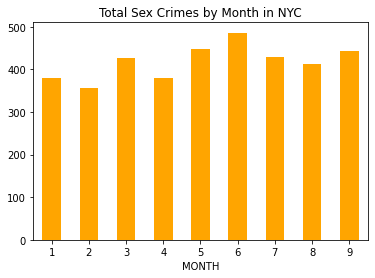

In [95]:
sex_crimesNYC.groupby('MONTH').size().plot(kind = 'bar', title ='Total Sex Crimes by Month in NYC', color = 'orange',rot=0)

In [73]:
BX_sexcrimes = Bronx_df[Bronx_df.TYPE_OF_OFFENSE.str.contains('SEX CRIMES|RAPE')] ##filtered to only show the Bronx data 

In [83]:
BX_sexcrimes['TYPE_OF_OFFENSE'].count()
## In the Bronx there were a total of 852 arrests due to sex crimes.

852

In [85]:
BX_percentage = BX_sexcrimes['TYPE_OF_OFFENSE'].count()/sex_crimesNYC['TYPE_OF_OFFENSE'].count()
BX_percentage
## About 23% of the sex crimes occur in the Bronx 

0.22653549587875565

In [79]:
BX_sexcrimes.groupby(['TYPE_OF_OFFENSE'])['ARREST_KEY'].count()

TYPE_OF_OFFENSE
RAPE          179
SEX CRIMES    673
Name: ARREST_KEY, dtype: int64

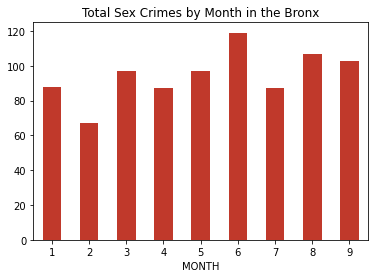

In [96]:
BX_sexcrimes.groupby('MONTH').size().plot(kind = 'bar', title ='Total Sex Crimes by Month in the Bronx', color = '#C0392B',rot=0)
## The month with the most sex crimes in the Bronx was June. The sex crimes had a slight increase in the summer months.  

## Conclusion

This data was interesting to inspect and analyze.  There was some bias going into this assigment since I reside in the Bronx. I was curious to see how the  data from Bronx would compare to the entire five Boroughs. I was surprised to learn that most crimes in NYC were due to Felonies. The Bronx did have more serious crimes compared to the rest of the city. I was also surprised to learn that Brooklyn was the Borough with the most arrests. The sex crime data was something I was also curious about. 